## Modeling

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [19]:
df = pd.read_csv('data_cleaned.csv')

In [20]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,0,1,36,1,1,0,1,1,6
1,1,1,37,1,2,8,2,4,6
2,0,1,69,0,2,0,1,1,6
3,1,1,59,0,3,11,3,2,6
4,0,0,19,0,4,11,1,4,6


In [21]:
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

In [22]:
df

array([[0.        , 1.        , 0.25352113, ..., 0.        , 0.        ,
        0.83333333],
       [1.        , 1.        , 0.26760563, ..., 0.5       , 0.375     ,
        0.83333333],
       [0.        , 1.        , 0.71830986, ..., 0.        , 0.        ,
        0.83333333],
       ...,
       [0.        , 0.        , 0.49295775, ..., 0.        , 0.125     ,
        0.83333333],
       [1.        , 1.        , 0.4084507 , ..., 1.        , 0.5       ,
        0.5       ],
       [0.        , 0.        , 0.35211268, ..., 0.        , 0.25      ,
        1.        ]])

In [34]:
dff = pd.DataFrame(np.array(df), columns =['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category'])

In [35]:
dff.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,0.0,1.0,0.253521,1.0,0.000,0.000000,0.0,0.000,0.833333
1,1.0,1.0,0.267606,1.0,0.125,0.571429,0.5,0.375,0.833333
2,0.0,1.0,0.718310,0.0,0.125,0.000000,0.0,0.000,0.833333
3,1.0,1.0,0.577465,0.0,0.250,0.785714,1.0,0.125,0.833333
4,0.0,0.0,0.014085,0.0,0.375,0.785714,0.0,0.375,0.833333


In [48]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(dff)
    sse.append(km.inertia_)


In [49]:
sse

[3037.4064976088525,
 2182.573719044609,
 1806.511281355385,
 1506.8194369400417,
 1287.9797109765977,
 1157.302215389477,
 1023.6491060186627,
 909.9675385087544,
 839.3352719152736]

In [56]:
mycenters = pd.DataFrame({'Cluster' : k_rng, 'SSE' : sse })

<AxesSubplot:xlabel='Cluster', ylabel='SSE'>

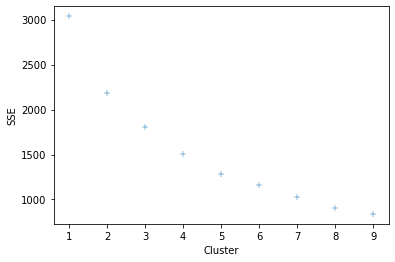

In [58]:
sns.scatterplot(x = 'Cluster', y = 'SSE', data = mycenters, marker = "+")

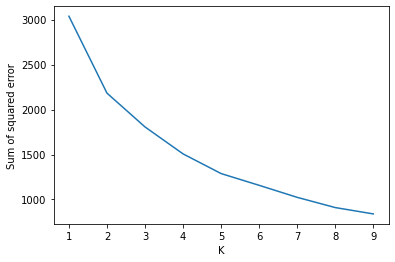

In [50]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [64]:

for i in range(3,15):
    labels = cluster.KMeans(n_clusters=i, init = "k-means++", random_state = 200).fit(dff).labels_
    print("Silhouette score for k(clusters) = "+str(i)+" is "
         + str(metrics.silhouette_score(dff,labels, metric='euclidean', sample_size=1000, random_state=200)))


Silhouette score for k(clusters) = 3 is 0.2619455722469936
Silhouette score for k(clusters) = 4 is 0.30102481837757855
Silhouette score for k(clusters) = 5 is 0.31622549375188297
Silhouette score for k(clusters) = 6 is 0.32190679816980994
Silhouette score for k(clusters) = 7 is 0.35580854302049886
Silhouette score for k(clusters) = 8 is 0.3864120891201902
Silhouette score for k(clusters) = 9 is 0.3589171352268503
Silhouette score for k(clusters) = 10 is 0.3420858415273973
Silhouette score for k(clusters) = 11 is 0.3441895654278276
Silhouette score for k(clusters) = 12 is 0.33048450630316056
Silhouette score for k(clusters) = 13 is 0.32543210712330845
Silhouette score for k(clusters) = 14 is 0.30884396639205136


In [77]:
Kmean = KMeans(n_clusters=8)
Kmean.fit(dff)

KMeans()

In [78]:
Kmean.cluster_centers_

array([[-1.11022302e-16,  6.66133815e-16,  2.76253264e-01,
         1.00000000e+00,  4.82522796e-01,  2.48588797e-01,
         9.11854103e-03,  1.62234043e-01,  7.09219858e-01,
         3.00000000e+00],
       [ 1.00000000e+00,  6.66133815e-16,  1.22492531e-01,
         2.22044605e-16,  2.96296296e-01,  1.57768158e-01,
         5.05050505e-03,  3.48484848e-01,  6.16722783e-01,
         6.00000000e+00],
       [ 1.00000000e+00,  9.97422680e-01,  4.56693771e-01,
         1.00000000e+00,  5.57345361e-01,  1.59793814e-01,
         6.81701031e-01,  2.47100515e-01,  7.33676976e-01,
         2.00000000e+00],
       [ 6.05095541e-01,  1.00000000e+00,  4.75464250e-01,
        -2.22044605e-16,  4.94957537e-01,  1.55747649e-01,
         4.73460722e-01,  2.49203822e-01,  6.63481953e-01,
         7.00000000e+00],
       [-1.11022302e-16,  5.55111512e-16,  1.44734516e-01,
         5.55111512e-16,  3.53033473e-01,  2.22056186e-01,
         4.18410042e-03,  3.15899582e-01,  6.34588563e-01,
         1.

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c=’b’)

plt.scatter(-0.94665068, -0.97138368, s=200, c=’g’, marker=’s’)

plt.scatter(2.01559419, 2.02597093, s=200, c=’r’, marker=’s’)

plt.show()

In [66]:
y_predicted = km.fit_predict(dff)
y_predicted

array([4, 2, 7, ..., 3, 2, 3])

In [68]:
dff['cluster'] = y_predicted
dff

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,cluster
0,0.0,1.0,0.253521,1.0,0.000,0.000000,0.0,0.000,0.833333,4
1,1.0,1.0,0.267606,1.0,0.125,0.571429,0.5,0.375,0.833333,2
2,0.0,1.0,0.718310,0.0,0.125,0.000000,0.0,0.000,0.833333,7
3,1.0,1.0,0.577465,0.0,0.250,0.785714,1.0,0.125,0.833333,7
4,0.0,0.0,0.014085,0.0,0.375,0.785714,0.0,0.375,0.833333,1
...,...,...,...,...,...,...,...,...,...,...
2622,1.0,0.0,0.154930,0.0,0.125,0.642857,0.0,0.375,0.833333,6
2623,0.0,0.0,0.239437,1.0,0.500,0.071429,0.0,0.000,0.833333,3
2624,0.0,0.0,0.492958,1.0,0.875,0.071429,0.0,0.125,0.833333,3
2625,1.0,1.0,0.408451,1.0,0.250,0.071429,1.0,0.500,0.500000,2


No handles with labels found to put in legend.


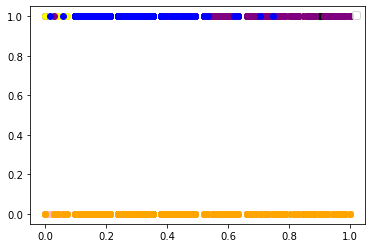

In [74]:
df1 = dff[dff.cluster==0]
df2 = dff[dff.cluster==1]
df3 = dff[dff.cluster==2]
df4 = dff[dff.cluster==3]
df5 = dff[dff.cluster==4]
df6 = dff[dff.cluster==5]
df7 = dff[dff.cluster==6]
df8 = dff[dff.cluster==7]
plt.scatter(df1.Age,df1.Graduated, color = 'green')
plt.scatter(df2.Age,df2.Graduated, color = 'red')
plt.scatter(df3.Age,df3.Graduated, color = 'black')
plt.scatter(df4.Age,df4.Graduated, color = 'yellow')
plt.scatter(df5.Age,df5.Graduated, color = 'purple')
plt.scatter(df6.Age,df6.Graduated, color = 'blue')
plt.scatter(df7.Age,df7.Graduated, color = 'pink')
plt.scatter(df8.Age,df8.Graduated, color = 'orange')

plt.legend()